In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./data/study_hour.csv')

print("dataset size: ",df.size)
print(df.head())

dataset size:  50
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [123]:
x = df.iloc[:,0:1]
print(x.head())

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5


In [124]:
y = df.iloc[:, 1:]
print(y.head())

   Scores
0      21
1      47
2      27
3      75
4      30


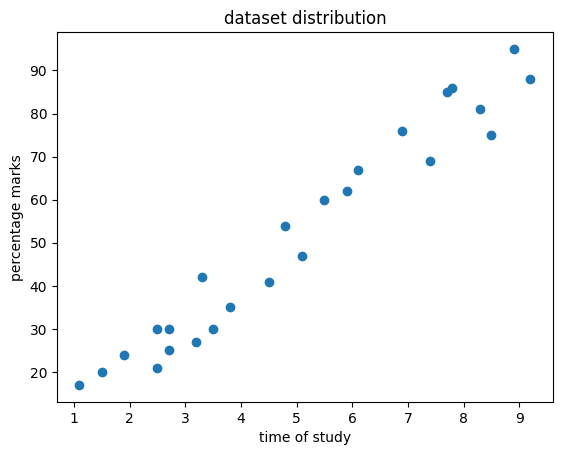

In [125]:
plt.scatter(x,y)
plt.title("dataset distribution")
plt.xlabel("time of study")
plt.ylabel("percentage marks")
plt.show()


In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/4,random_state=0)
print("split x as:",x_train.size, x_test.size,"\nsplit y as:", y_train.size, y_test.size)

split x as: 18 7 
split y as: 18 7


In [127]:
print(x_train, y_train, x_test, y_test, sep='\n\n')

    Hours
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5

    Scores
24      86
23      76
14      17
1       47
10      85
13      42
8       81
6       88
18      67
4       30
9       25
7       60
20      30
3       75
0       21
21      54
15      95
12      41

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9

    Scores
5       20
2       27
19      69
16      30
11      62
22      35
17      24


In [128]:
from sklearn.preprocessing import StandardScaler

# For inputs (X)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)     # fit on training data
x_test = sc_x.transform(x_test)           # transform test data using training stats

# For outputs (Y)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc_y.transform(y_test.values.reshape(-1, 1))
print(x_train, y_train, x_test, y_test, sep='\n\n')


[[ 0.93209944]
 [ 0.56648174]
 [-1.78972121]
 [-0.16475365]
 [ 0.89147525]
 [-0.89598905]
 [ 1.13522039]
 [ 1.50083809]
 [ 0.24148823]
 [-0.81474068]
 [-1.13973419]
 [-0.0022569 ]
 [-1.13973419]
 [ 1.21646876]
 [-1.22098256]
 [-0.28662622]
 [ 1.37896552]
 [-0.40849879]]

[[ 1.16733053]
 [ 0.76937694]
 [-1.57854924]
 [-0.38468847]
 [ 1.12753517]
 [-0.58366527]
 [ 0.96835374]
 [ 1.24692125]
 [ 0.41121871]
 [-1.06120957]
 [-1.26018637]
 [ 0.1326512 ]
 [-1.06120957]
 [ 0.72958158]
 [-1.4193678 ]
 [-0.10612096]
 [ 1.52548876]
 [-0.62346062]]

[[-1.62722445]
 [-0.93661324]
 [ 0.76960269]
 [-1.22098256]
 [ 0.16023986]
 [-0.69286811]
 [-1.4647277 ]]

[[-1.45916316]
 [-1.18059565]
 [ 0.49080943]
 [-1.06120957]
 [ 0.21224191]
 [-0.86223278]
 [-1.29998173]]


In [129]:
from sklearn.linear_model import LinearRegression

r = LinearRegression()
r.fit(x_train,y_train)
y_predict=r.predict(x_test)
for a,b in zip(sc_x.inverse_transform(x_test), sc_y.inverse_transform(y_predict.reshape(-1, 1))):
  print('Hours input:',a,'Percentage predicted:',b)



Hours input: [1.5] Percentage predicted: [16.84472176]
Hours input: [3.2] Percentage predicted: [33.74557494]
Hours input: [7.4] Percentage predicted: [75.50062397]
Hours input: [2.5] Percentage predicted: [26.7864001]
Hours input: [5.9] Percentage predicted: [60.58810646]
Hours input: [3.8] Percentage predicted: [39.71058194]
Hours input: [1.9] Percentage predicted: [20.8213931]


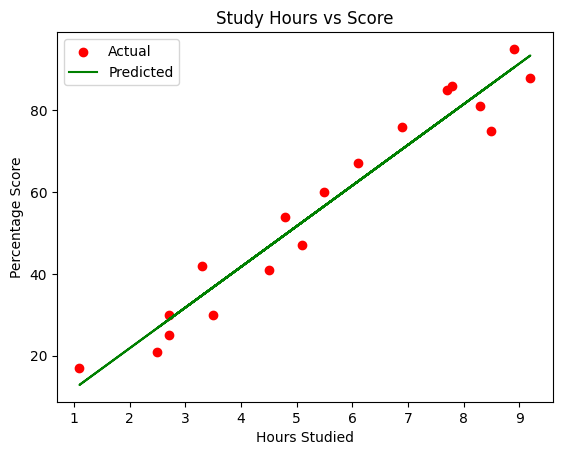

In [136]:
x_train_original = sc_x.inverse_transform(x_train)
y_train_original = sc_y.inverse_transform(y_train)
y_pred_original = sc_y.inverse_transform(r.predict(x_train).reshape(-1, 1))

# 
plt.scatter(x_train_original, y_train_original, color="red", label="Actual")
plt.plot(x_train_original, y_pred_original, color="green", label="Predicted")
plt.title("Study Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.legend()
plt.show()

In [131]:
def evaluate(hrs):
  hrs = np.array(hrs)                # convert input to numpy array
  return sc_y.inverse_transform(r.predict(sc_x.transform(hrs.reshape(-1, 1))))

print(r.score(x_test,y_test))

0.9367661043365056


In [132]:
evaluate([9,2,4])

C:\Users\dashp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[91.40730931],
       [21.81556093],
       [41.69891761]])

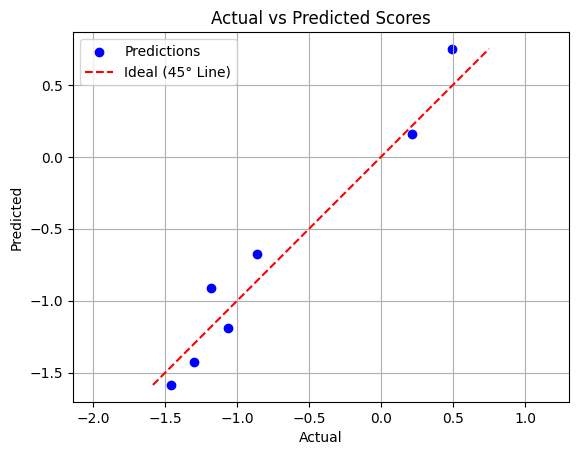

In [133]:
import matplotlib.pyplot as plt

y_pred = r.predict(x_test)
y_test_flat = y_test.flatten() if hasattr(y_test, 'flatten') else y_test
plt.scatter(y_test_flat, y_pred, color='blue', label='Predictions')
min_val = min(min(y_test_flat), min(y_pred))
max_val = max(max(y_test_flat), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (45° Line)')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
